# PyTorch - How to use the GPU - Solutions

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
# This code does not need to be modified!

import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze()),
                                ])

trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )



In [10]:
# This code does not need to be modified!

bs=128

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

In [11]:
if torch.cuda.is_available():
  print('GPU is available!')
  device = torch.device('cuda')
else:
  print('GPU is not available!')
  device = torch.device('cpu')

GPU is available!


In [12]:
# This code does not need to be modified!

class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size1, output_size):
        super(TwoLayerNet , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1, bias=False)
        self.layer2 = nn.Linear(hidden_size1, output_size, bias=False)
        
    def forward(self, x):
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        z       = self.layer2(y_hat)
        return F.softmax(z, dim=1)
  


In [13]:

net=TwoLayerNet(784, 64, 10).to(device)  # Move the model to GPU

criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.1)

for epoch in range(1, 5):

  for i, (minibatch_data, minibatch_label) in enumerate(trainloader):
      minibatch_data, minibatch_label = minibatch_data.to(device), minibatch_label.to(device)  # Move the data to GPU

      # Set dL/dU, dL/dV, dL/dW to be filled with zeros
      optimizer.zero_grad()
      
      #reshape the minibatch
      inputs = minibatch_data.view(bs, 784)

      # forward the minibatch through the net  
      prob=net(inputs) 
      
      # Compute the average of the losses of the data points in the minibatch
      loss = criterion(prob , minibatch_label) 
      
      # backward pass to compute dL/dU, dL/dV and dL/dW    
      loss.backward()
      
      # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
      optimizer.step()

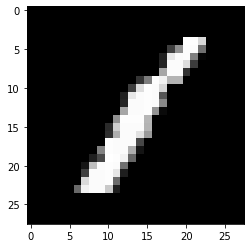

Confidence scores:
0: 1.6348664644283417e-09
1: 0.9997387528419495
2: 3.79538323613815e-05
3: 2.240582489321241e-06
4: 9.228790531778941e-08
5: 3.122357270513021e-07
6: 1.0412494475531275e-06
7: 2.7542699232441237e-09
8: 0.00021950947120785713
9: 3.018627570128274e-09

Label with highest confidence score: 1


In [14]:
# This code does not need to be modified!

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0].cpu(), label_minibatch[0].cpu()

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob = net.cpu()(im.view(1,784)) 

print('Confidence scores:\n' + '\n'.join(['{}: {}'.format(i, p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(torch.argmax(prob).item()))
